<a href="https://colab.research.google.com/github/Rajeshgit-R/airline_price_prediction_project/blob/main/Airline_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("/content/drive/MyDrive/Data/Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(10682, 11)

In [8]:
data.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [9]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [10]:
data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [11]:
def change_to_date(column):
  data[column]=pd.to_datetime(data[column],infer_datetime_format=True)

In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
  change_to_date(i)

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-26 05:50:00,2024-11-26 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-26 18:05:00,2024-11-26 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-26 16:50:00,2024-11-26 21:35:00,4h 45m,1 stop,No info,13302


In [15]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
data["journey_date"]=data["Date_of_Journey"].dt.day
data["journey_month"]=data["Date_of_Journey"].dt.month

In [18]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-26 05:50:00,2024-11-26 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6


In [19]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [20]:
def getting_hr(df,column):
  df[column+"_hr"]=df[column].dt.hour
def getting_min(df,column):
  df[column+"_min"]=df[column].dt.minute
def drop_column(df,column):
  df.drop(column,axis=1,inplace=True)

In [21]:
getting_hr(data,"Arrival_Time")
getting_min(data,"Arrival_Time")
getting_hr(data,"Dep_Time")
getting_min(data,"Dep_Time")

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-26 05:50:00,2024-11-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-26 18:05:00,2024-11-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-26 16:50:00,2024-11-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [23]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [24]:
duration=list(data["Duration"])

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [26]:
for i in range(len(duration)):
  if len(duration[i].split(" "))==2:
    pass
  else:
    if "h" in duration[i]:
      duration[i]=duration[i]+" 0m"
    else:
      duration[i]="0h "+duration[i]

In [27]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [28]:
data["Duration"]=duration

In [29]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-26 05:50:00,2024-11-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-26 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-26 18:05:00,2024-11-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-26 16:50:00,2024-11-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [30]:
def hour(i):
  return i.split(" ")[0][0:-1]
def minute(i):
  return i.split(" ")[1][0:-1]


In [31]:
data["Duration_hr"]=data["Duration"].apply(hour)
data["Duration_min"]=data["Duration"].apply(minute)

In [32]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-26 05:50:00,2024-11-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-26 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-26 18:05:00,2024-11-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-26 16:50:00,2024-11-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [33]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [34]:
data["Duration_hr"]=data["Duration_hr"].astype(int)
data["Duration_min"]=data["Duration_min"].astype(int)

In [35]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_date', 'journey_month',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Dep_Time_hr', 'Dep_Time_min',
       'Duration_hr', 'Duration_min'],
      dtype='object')

In [37]:
for i in ["Date_of_Journey","Dep_Time","Arrival_Time","Duration"]:
  drop_column(data,i)

In [38]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [39]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
dict_a={"non-stop":0, "2 stops":2, "1 stop":1, "3 stops":3, "4 stops":4}

In [41]:
data["Total_Stops"]=data["Total_Stops"].map(dict_a)

In [42]:
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,9,25,19,0


In [43]:
data.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,int64
Additional_Info,object
Price,int64
journey_date,int32
journey_month,int32
Arrival_Time_hr,int32


In [44]:
data["Airline"].nunique()

12

In [45]:
cat_data=data.select_dtypes(object)
cat_data

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info


In [46]:
cont_data=data.select_dtypes((int,float))
cont_data

,Total_Stops,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,0,3897,24,3,1,10,22,20,2,50
1,2,7662,1,5,13,15,5,50,7,25
2,2,13882,9,6,4,25,9,25,19,0
3,1,6218,12,5,23,30,18,5,5,25
4,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,22,25,19,55,2,30
10679,0,4145,27,4,23,20,20,45,2,35
10680,0,7229,27,4,11,20,8,20,3,0
10681,0,12648,1,3,14,10,11,30,2,40


In [47]:
cat_data["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


<Axes: xlabel='Airline', ylabel='Price'>

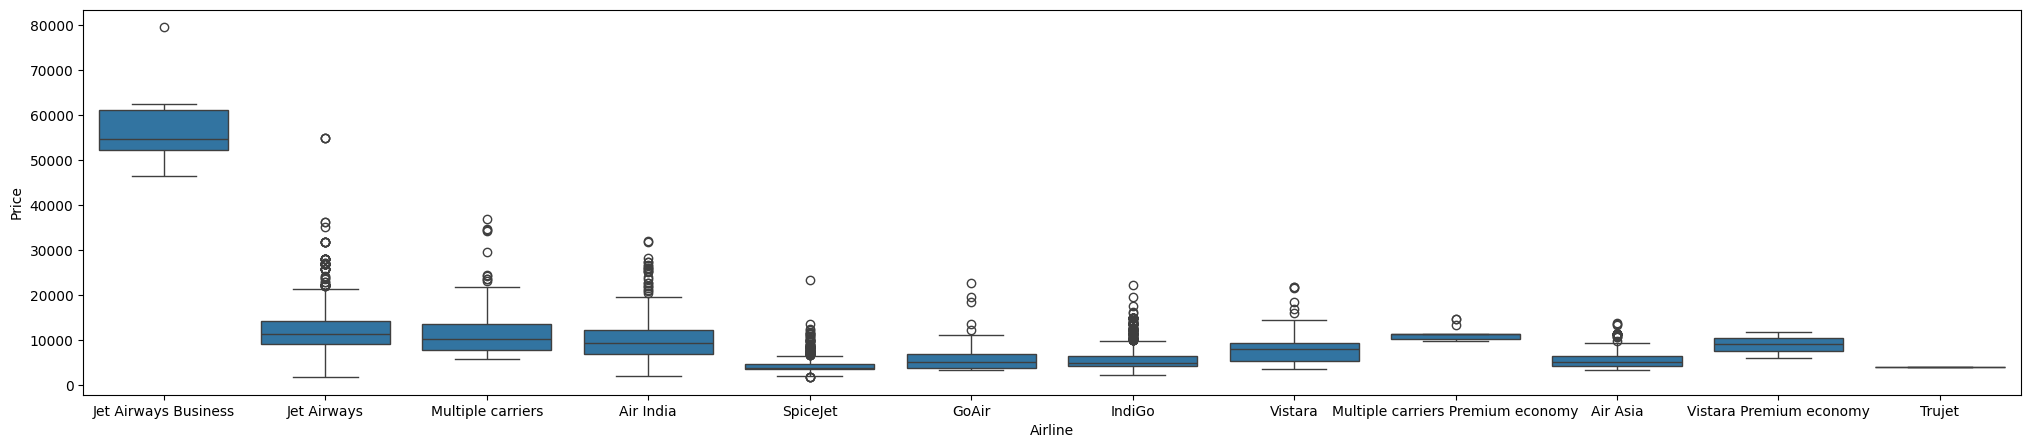

In [48]:
plt.figure(figsize=(25,5))
sns.boxplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

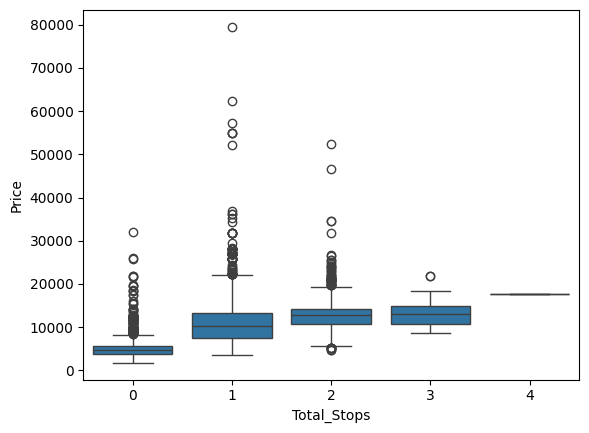

In [49]:
sns.boxplot(x="Total_Stops",y="Price",data=data.sort_values("Price",ascending=False))

In [50]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [51]:
Airline=pd.get_dummies(cat_data["Airline"],drop_first=True).astype(int)

In [52]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [53]:
data[["Airline"]]

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [54]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

In [55]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [56]:
Source=pd.get_dummies(cat_data["Source"],drop_first=True).astype(int)

In [57]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [58]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [63]:
Destination=pd.get_dummies(cat_data["Destination"],drop_first=True).astype(int)

In [64]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [65]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR


In [62]:
cat_data["route_1"]=cat_data["Route"].str.split("→").str[0]

In [66]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR


In [67]:
cat_data["route_2"]=cat_data["Route"].str.split("→").str[1]
cat_data["route_3"]=cat_data["Route"].str.split("→").str[2]
cat_data["route_4"]=cat_data["Route"].str.split("→").str[3]
cat_data["route_5"]=cat_data["Route"].str.split("→").str[4]
cat_data["route_6"]=cat_data["Route"].str.split("→").str[5]

In [68]:
cat_data

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN


In [69]:
cat_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,0
Additional_Info,0
route_1,0
route_2,0
route_3,3491
route_4,9116
route_5,10636


In [70]:
cat_data.shape

(10682, 11)

In [71]:
data["Additional_Info"].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
for i in ["Route","Additional_Info"]:
  drop_column(cat_data,i)

In [72]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,NaN,NaN,NaN


In [73]:
cat_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,0
Additional_Info,0
route_1,0
route_2,0
route_3,3491
route_4,9116
route_5,10636


In [74]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'route_1', 'route_2', 'route_3', 'route_4', 'route_5', 'route_6'],
      dtype='object')

In [75]:
for i in ["route_3","route_4","route_5","route_6"]:
  cat_data[i].fillna("None",inplace=True)

In [76]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,None,None,None


In [77]:
drop_column(cat_data,"route_6")

In [78]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,None,None


In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le=LabelEncoder()

In [81]:
for i in ["route_1","route_2","route_3","route_4","route_5"]:
  cat_data[i]=le.fit_transform(cat_data[i])

In [82]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,0,34,8,13,5


In [83]:
new_data=pd.concat([cat_data,Source,Destination,cont_data],axis=1)

In [84]:
new_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,...,Total_Stops,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,0,13,29,13,5,...,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,2,25,1,3,5,...,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,3,32,4,5,5,...,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,2,34,3,13,5,...,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,0,34,8,13,5,...,1,13302,1,3,21,35,16,50,4,45


In [85]:
for i in ["Airline","Source","Destination"]:
  drop_column(new_data,i)

In [86]:
new_data.head()

,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,...,Total_Stops,Price,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,BLR → DEL,No info,0,13,29,13,5,0,0,0,...,0,3897,24,3,1,10,22,20,2,50
1,CCU → IXR → BBI → BLR,No info,2,25,1,3,5,0,0,1,...,2,7662,1,5,13,15,5,50,7,25
2,DEL → LKO → BOM → COK,No info,3,32,4,5,5,0,1,0,...,2,13882,9,6,4,25,9,25,19,0
3,CCU → NAG → BLR,No info,2,34,3,13,5,0,0,1,...,1,6218,12,5,23,30,18,5,5,25
4,BLR → NAG → DEL,No info,0,34,8,13,5,0,0,0,...,1,13302,1,3,21,35,16,50,4,45


In [87]:
new_data.dtypes

,0
Route,object
Additional_Info,object
route_1,int64
route_2,int64
route_3,int64
route_4,int64
route_5,int64
Chennai,int64
Delhi,int64
Kolkata,int64


<Axes: xlabel='Price'>

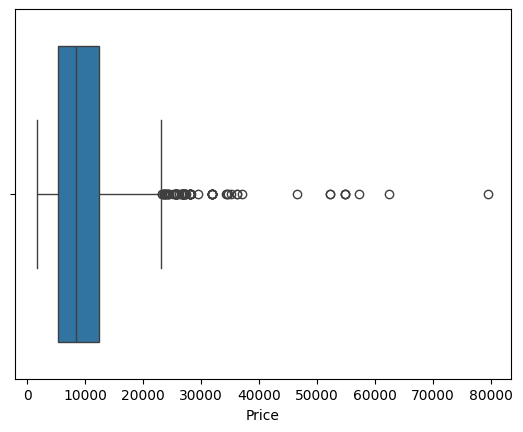

In [88]:
sns.boxplot(x=new_data["Price"])

<Axes: xlabel='Price', ylabel='Count'>

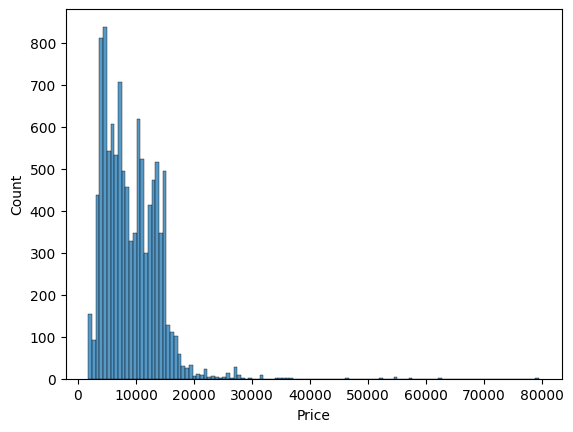

In [89]:
sns.histplot(x=new_data["Price"])

In [90]:
new_data["Price"]=np.where(new_data["Price"]>=40000,new_data["Price"].median(),new_data["Price"])

<Axes: xlabel='Price'>

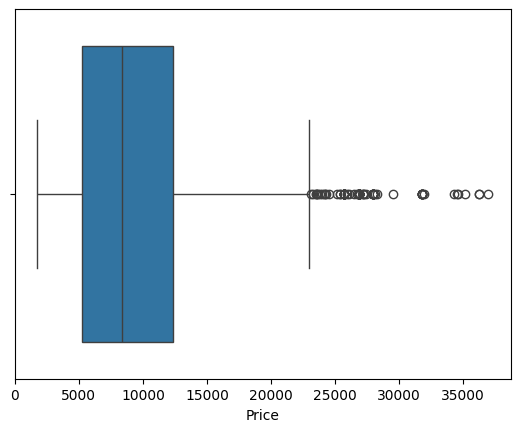

In [91]:
sns.boxplot(x=new_data["Price"])

<Axes: xlabel='Price', ylabel='Count'>

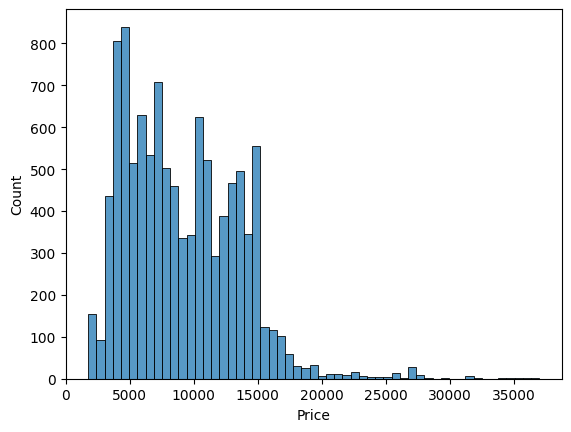

In [92]:
sns.histplot(x=new_data["Price"])

In [93]:
X=new_data.drop("Price",axis=1)

In [94]:
X.head()

,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,...,New Delhi,Total_Stops,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,BLR → DEL,No info,0,13,29,13,5,0,0,0,...,1,0,24,3,1,10,22,20,2,50
1,CCU → IXR → BBI → BLR,No info,2,25,1,3,5,0,0,1,...,0,2,1,5,13,15,5,50,7,25
2,DEL → LKO → BOM → COK,No info,3,32,4,5,5,0,1,0,...,0,2,9,6,4,25,9,25,19,0
3,CCU → NAG → BLR,No info,2,34,3,13,5,0,0,1,...,0,1,12,5,23,30,18,5,5,25
4,BLR → NAG → DEL,No info,0,34,8,13,5,0,0,0,...,1,1,1,3,21,35,16,50,4,45


In [95]:
X.shape

(10682, 25)

In [96]:
y=new_data["Price"]

In [97]:
y

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0
...,...
10678,4107.0
10679,4145.0
10680,7229.0
10681,12648.0


In [101]:
from sklearn.feature_selection import mutual_info_classif

In [106]:
imp_df=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [107]:
imp_df

,0
Route,3.411478
Additional_Info,1.921708
route_1,2.320549
route_2,2.980960
route_3,2.552408
route_4,1.678789
route_5,1.447434
Chennai,0.184335
Delhi,1.377434
Kolkata,0.815387


In [108]:
imp_df.columns=["Importance"]

In [109]:
imp_df.sort_values(by="Importance",ascending=False)

,Importance
Route,3.411478
route_2,2.980960
route_3,2.552408
route_1,2.320549
Additional_Info,1.921708
Total_Stops,1.909767
Arrival_Time_hr,1.881749
Duration_hr,1.785450
route_4,1.678789
journey_month,1.639758


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [112]:
X_train

,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,...,New Delhi,Total_Stops,journey_date,journey_month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
1684,104,8,3,7,6,13,5,0,1,0,...,0,1,15,6,19,0,11,25,7,35
5434,64,8,2,5,29,13,5,0,0,1,...,0,0,24,5,11,25,9,0,2,25
5729,104,5,3,7,6,13,5,0,1,0,...,0,1,18,5,4,25,2,15,26,10
6591,104,8,3,7,6,13,5,0,1,0,...,0,1,21,3,15,30,8,55,6,35
9470,34,8,0,42,14,6,5,0,0,0,...,1,2,15,3,21,25,10,30,10,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,18,5,0,13,29,13,5,0,0,0,...,0,0,9,6,18,10,15,15,2,55
7589,116,5,3,28,4,5,5,0,1,0,...,0,2,24,6,12,35,9,40,26,55
401,113,8,3,21,4,5,5,0,1,0,...,0,2,3,6,12,35,9,35,27,0
9371,18,8,0,13,29,13,5,0,0,0,...,0,0,21,6,23,55,21,5,2,50


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
RF=RandomForestRegressor()

In [115]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
y_pred=RF.predict(X_test)

In [120]:
print(f"Training Score: {RF.score(X_train,y_train)}")
print(f"Testing Score: {RF.score(X_train,y_train)}")

Training Score: 0.9752417818791487
Testing Score: 0.9752417818791487


In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [122]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"r2_score: {r2_score(y_test,y_pred)}")

MAE: 740.3375217706174
MSE: 2096823.5046641752
r2_score: 0.8920535514748851


<Axes: xlabel='Price', ylabel='Density'>

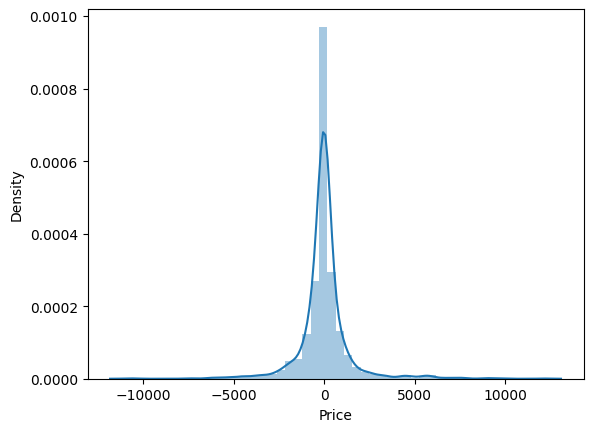

In [123]:
sns.distplot(y_test-y_pred)

In [124]:
def algorithm(model):
  model=model.fit(X_train,y_train)
  print(f"Training score: {model.score(X_train,y_train)}")
  print(f"Testing score: {model.score(X_train,y_train)}")
  y_pred=model.predict(X_test)
  print(y_pred)
  print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
  print(f"MSE: {mean_squared_error(y_test,y_pred)}")
  print(f"r2_score: {r2_score(y_test,y_pred)}")
  sns.distplot(y_test-y_pred)
  return y_pred



In [125]:
from sklearn.ensemble import RandomForestClassifier

Training score: 0.8715038033937975
Testing score: 0.8715038033937975
[12476.  8603.  9564. ... 14781.  5073.  9663.]
MAE: 1483.1661207299953
MSE: 7317732.505381376
r2_score: 0.627002772769115


array([12476.,  8603.,  9564., ..., 14781.,  5073.,  9663.])

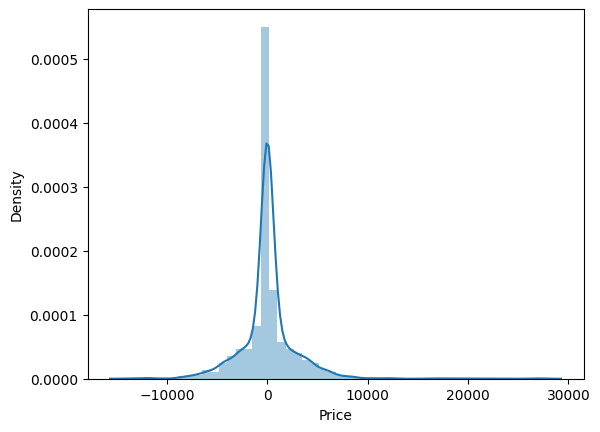

In [ ]:
algorithm(RandomForestClassifier())

In [126]:
from sklearn.ensemble import AdaBoostRegressor

Training score: 0.5438744503715498
Testing score: 0.5438744503715498
[10332.8474407  14834.88453815 10755.06594071 ... 10690.69594595
 10706.13911684 10690.69594595]
MAE: 2349.8931749064964
MSE: 8565670.40617836
r2_score: 0.55903122149915


array([10332.8474407 , 14834.88453815, 10755.06594071, ...,
       10690.69594595, 10706.13911684, 10690.69594595])

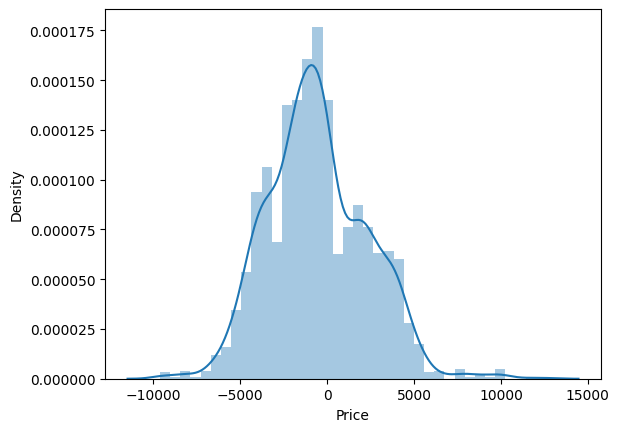

In [127]:
algorithm(AdaBoostRegressor())

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

Training score: 0.7795000698850262
Testing score: 0.7795000698850262
[ 9693.02811563 13826.68015155 12460.48433218 ... 11365.43927755
 10778.58976764 11723.48086742]
MAE: 1519.7628864478904
MSE: 4084703.1040566256
r2_score: 0.7897156377818053


array([ 9693.02811563, 13826.68015155, 12460.48433218, ...,
       11365.43927755, 10778.58976764, 11723.48086742])

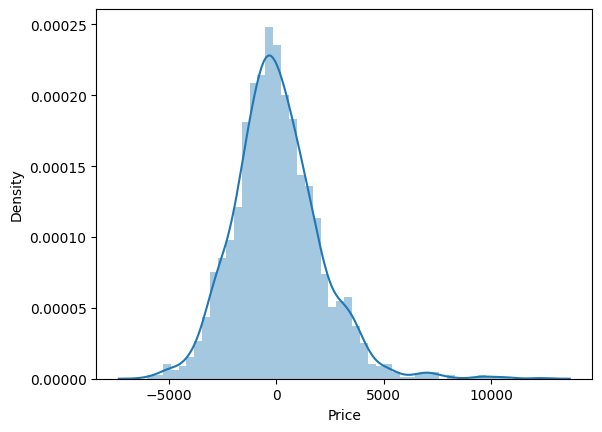

In [129]:
algorithm(GradientBoostingRegressor())